# logistic回归

In [1]:
filename = './原书代码数据/chapter5/demo/data/bankloan.xls'
data = pd.read_excel(filename)

In [3]:
data.head()

,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [27]:
x = data.iloc[:,:8].values
y = data.iloc[:,8].values

from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import RandomizedLogisticRegression as RLR
rlr = RLR()  #建立随机逻辑回归模型，筛选变量
rlr.fit(x,y) #训练模型
rlr.get_support() #获取特征筛选结果
rlr.scores_  #各个特征值分数
x = data[data.iloc[:,:8].columns[rlr.get_support()]].values #选出需要的特征

lr = LR() #建立逻辑回归模型
lr.fit(x,y) #使用筛选后的特征数据来训练模型
lr.score(x,y)#模型平均正确率




RandomizedLogisticRegression(C=1, fit_intercept=True, memory=None, n_jobs=1,
               n_resampling=200, normalize=True, pre_dispatch='3*n_jobs',
               random_state=None, sample_fraction=0.75, scaling=0.5,
               selection_threshold=0.25, tol=0.001, verbose=False)

array([False, False,  True,  True, False,  True,  True, False])

array([0.09 , 0.09 , 0.975, 0.43 , 0.   , 0.995, 0.48 , 0.06 ])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.8142857142857143

# 决策树

In [1]:
filename = './原书代码数据/chapter5/demo/data/sales_data.xls'
data = pd.read_excel(filename,index_col='序号')

In [2]:
data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,坏,是,是,高
2,坏,是,是,高
3,坏,是,是,高
4,坏,否,是,高
5,坏,是,是,高


In [3]:
data[data=='好'] = 1
data[data=='是'] = 1
data[data=='高'] = 1
data[data != 1] = -1
data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,-1,1,1,1
2,-1,1,1,1
3,-1,1,1,1
4,-1,-1,1,1
5,-1,1,1,1


In [4]:
x = data.iloc[:,:3].values.astype(int)
y = data.iloc[:,3].values.astype(int)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

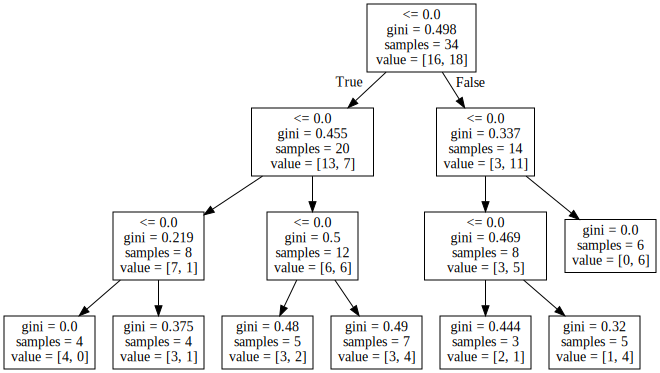

In [14]:
from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC() #建立决策树模型，基于信息熵
dtc.fit(x,y) #训练模型
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
# with open('./原书代码数据/chapter5/demo/tmp/tree.dot','w',encoding='utf-8') as f:
#     f = export_graphviz(dtc,feature_names=data.iloc[:,:3].columns,out_file=f)
dtc_data = export_graphviz(dtc,out_file=None,feature_names=data.iloc[:,:3].columns.values)
import graphviz
graph = graphviz.Source(dtc_data)
graph

In [19]:
dtc.predict_proba([[1,0,0]])
dtc.predict([[1,0,0]])

array([[ 0.75,  0.25]])

array([-1])

In [46]:
!pip install Graphviz

In [9]:
from graphviz import Digraph

dot = Digraph(comment='The Round Table')

#添加圆点 A, A的标签是 King Arthur
dot.node('A', 'King Arthur')
#dot.view()  #后面这句就注释了，也可以使用这个命令查看效果

#添加圆点 B, B的标签是 Sir Bedevere the Wise
dot.node('B', 'Sir Bedevere the Wise')
#dot.view()

#添加圆点 L, L的标签是 Sir Lancelot the Brave
dot.node('L', 'Sir Lancelot the Brave')
#dot.view()

#创建一堆边，即连接AB的边，连接AL的边。
dot.edges(['AB', 'AL'])
#dot.view()

#在创建两圆点之间创建一条边
dot.edge('B', 'L', constraint='false')
dot.view()

#获取DOT source源码的字符串形式
print(dot.source) 

'Digraph.gv.pdf'

// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}


# 神经网络（安装有问题）

In [10]:
filename = './原书代码数据/chapter5/demo/data/sales_data.xls'
data = pd.read_excel(filename,index_col='序号')
data[data=='好'] = 1
data[data=='是'] = 1
data[data=='高'] = 1
data[data != 1] = -1
x = data.iloc[:,:3].values.astype(int)
y = data.iloc[:,3].values.astype(int)

# K-Means聚类算法

In [10]:
filename = './原书代码数据/chapter5/demo/data/consumption_data.xls'
data = pd.read_excel(filename,index_col='Id')
data.head()

,R,F,M
Id,,,
1,27,6,232.61
2,3,5,1507.11
3,4,16,817.62
4,3,11,232.81
5,14,7,1913.05


In [11]:
k = 3 #聚类的类别
iteration = 500 #聚类最大的循环次数
data_zs = 1.0 * (data - data.mean())/data.std() #数据标准化
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k,n_jobs=4,max_iter=iteration) #分为K类，并开始聚类
model.fit(data_zs) #开始聚类

model.labels_
model.cluster_centers_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0,

array([[-0.16045063,  1.11480154,  0.39284443],
       [-0.14935336, -0.65889299, -0.27177977],
       [ 3.45505486, -0.29565357,  0.44912342]])

In [12]:
r1 = Series(model.labels_).value_counts() #统计各个类别的数量
r2 = DataFrame(model.cluster_centers_) #找出聚类中心
r = pd.concat([r2,r1],axis=1)
r.columns = list(data.columns) + ['数目类别']
r

,R,F,M,数目类别
0,-0.160451,1.114802,0.392844,341
1,-0.149353,-0.658893,-0.271780,559
2,3.455055,-0.295654,0.449123,40


In [13]:
r = pd.concat([data,Series(model.labels_,index=data.index)],axis=1)
r.columns = list(data.columns)+['聚类类别']
r.head()

,R,F,M,聚类类别
Id,,,,
1,27,6,232.61,1
2,3,5,1507.11,1
3,4,16,817.62,0
4,3,11,232.81,1
5,14,7,1913.05,1


In [28]:
def density_plot(data,title):#自定义作图函数
    plt.rcParams['font.sans-serif'] = ['SimHei'] #用户正常显示中文
    plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
    plt.figure()
    for i in range(len(data.iloc[0])):
        (data.iloc[:,i].plot(kind='kde',label=data.columns[i]))
    plt.xlabel('人数')
    plt.ylabel('密度')
    plt.title('聚类类别{}各属性密度曲线'.format(title))
    plt.legend()
    return plt

<module 'matplotlib.pyplot' from 'c:\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

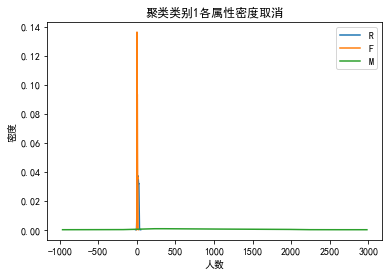

In [33]:
density_plot(data[r.聚类类别==1],1)

In [44]:
def density_plot_2(data):#自定义作图函数
    plt.rcParams['font.sans-serif'] = ['SimHei'] #用户正常显示中文
    plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
    p = data.plot(kind='kde',subplots=True,sharex=False,figsize=(8,12))
    for i in range(k): #此处K为聚类数目
        p[i].set_ylabel('密度')
    plt.legend()
    return plt

<module 'matplotlib.pyplot' from 'c:\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

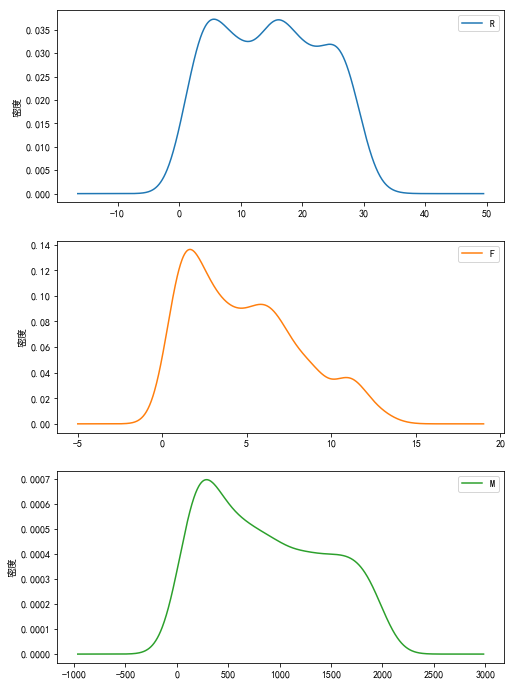

In [45]:
density_plot_2(data[r.聚类类别==1])

# 用TSNE进行数据降维并展示聚类结果

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(data_zs) #进行数据降维
tsne = DataFrame(tsne.embedding_,index=data_zs.index)
tsne.head()

array([[-15.673392 , -21.08942  ],
       [ 28.288708 ,  -4.407755 ],
       [-26.606363 ,  15.421781 ],
       ...,
       [  0.5542932,   1.5617381],
       [  1.4250205,  -7.6967645],
       [  3.3384554, -15.488886 ]], dtype=float32)

,0,1
Id,,
1,-15.673392,-21.089420
2,28.288708,-4.407755
3,-26.606363,15.421781
4,-27.431267,7.292149
5,19.106894,5.653963


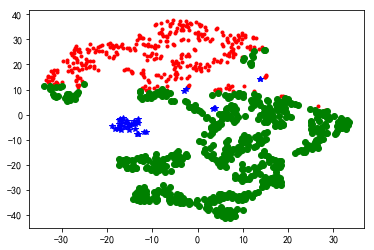

In [21]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #用户正常显示中文
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
d = tsne[r.聚类类别==0]
plt.plot(d[0],d[1],'r.')
d = tsne[r.聚类类别==1]
plt.plot(d[0],d[1],'go')
d = tsne[r.聚类类别==2]
plt.plot(d[0],d[1],'b*')

# 关联规则Apriori算法

In [2]:
filename = './原书代码数据/chapter5/demo/data/menu_orders.xls'
data = pd.read_excel(filename,header=None)
data.head()

,0,1,2,3
0,a,c,e,NaN
1,b,d,NaN,NaN
2,b,c,NaN,NaN
3,a,b,c,d
4,a,b,NaN,NaN


In [5]:
#转换原始数据至0-1矩阵 
ct = lambda x : Series(1,index=x[pd.notnull(x)])
b = map(ct,data.values)
data_new = DataFrame(list(b)).fillna(0)
data_new

,a,c,e,b,d
0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0
3,1.0,1.0,0.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0
7,1.0,1.0,1.0,1.0,0.0
8,1.0,1.0,0.0,1.0,0.0
9,1.0,1.0,1.0,0.0,0.0


In [53]:
# %load ./原书代码数据/chapter5/demo/code/5-6_apriori.py
import pandas as pd

#自定义连接函数，用于实现L_{k-1}到C_k的连接
def connect_string(x, ms):
  x = list(map(lambda i:sorted(i.split(ms)), x))
  l = len(x[0])
  r = []
  for i in range(len(x)):
    for j in range(i,len(x)):
      if x[i][:l-1] == x[j][:l-1] and x[i][l-1] != x[j][l-1]:
        r.append(x[i][:l-1]+sorted([x[j][l-1],x[i][l-1]]))
  return r

#寻找关联规则的函数
def find_rule(d, support, confidence, ms = u'--'):
  result = pd.DataFrame(index=['support', 'confidence']) #定义输出结果
  support_series = 1.0*d.sum()/len(d) #支持度序列
  column = list(support_series[support_series > support].index) #初步根据支持度筛选
  k = 0
  
  while len(column) > 1:
    print(column)
    k = k+1
    print(u'\n正在进行第%s次搜索...' %k)
    column = connect_string(column, ms)
    print(u'数目：%s...:%s' %(len(column),column))
    sf = lambda i: d[i].prod(axis=1, numeric_only = True) #新一批支持度的计算函数
    
    #创建连接数据，这一步耗时、耗内存最严重。当数据集较大时，可以考虑并行运算优化。
    d_2 = pd.DataFrame(list(map(sf,column)), index = [ms.join(i) for i in column]).T
    
    support_series_2 = 1.0*d_2[[ms.join(i) for i in column]].sum()/len(d) #计算连接后的支持度
    
    column = list(support_series_2[support_series_2 > support].index) #新一轮支持度筛选
    support_series = support_series.append(support_series_2)
    column2 = []

    for i in column: #遍历可能的推理，如{A,B,C}究竟是A+B-->C还是B+C-->A还是C+A-->B？
      i = i.split(ms)
      for j in range(len(i)):
        column2.append(i[:j]+i[j+1:]+i[j:j+1])    
    print(column2)
    
    cofidence_series = pd.Series(index=[ms.join(i) for i in column2]) #定义置信度序列
 
    for i in column2: #计算置信度序列
      cofidence_series[ms.join(i)] = support_series[ms.join(sorted(i))]/support_series[ms.join(i[:len(i)-1])]
    
    
    for i in cofidence_series[cofidence_series > confidence].index: #置信度筛选
      result[i] = 0.0
      result[i]['confidence'] = cofidence_series[i]
      result[i]['support'] = support_series[ms.join(sorted(i.split(ms)))]
  
  result = result.T.sort_values(['confidence','support'], ascending = False) #结果整理，输出
  print(u'\n结果为：')
  print(result)  
  return result

In [54]:
support = 0.2 #最小支持度
confidence= 0.5 # 最小置信度
ms = '---' #连接符，默认'--‘，用来区分不同的元素，如A--B。需要保证原始表格不含有该字符
find_rule(data_new,support,confidence,ms)

['a', 'c', 'e', 'b']

正在进行第1次搜索...
数目：6...:[['a', 'c'], ['a', 'e'], ['a', 'b'], ['c', 'e'], ['b', 'c'], ['b', 'e']]
[['c', 'a'], ['a', 'c'], ['e', 'a'], ['a', 'e'], ['b', 'a'], ['a', 'b'], ['e', 'c'], ['c', 'e'], ['c', 'b'], ['b', 'c']]
['a---c', 'a---e', 'a---b', 'c---e', 'b---c']

正在进行第2次搜索...
数目：3...:[['a', 'c', 'e'], ['a', 'b', 'c'], ['a', 'b', 'e']]
[['c', 'e', 'a'], ['a', 'e', 'c'], ['a', 'c', 'e'], ['b', 'c', 'a'], ['a', 'c', 'b'], ['a', 'b', 'c']]
['a---c---e', 'a---b---c']

正在进行第3次搜索...
数目：0...:[]
[]

结果为：
           support  confidence
e---a          0.3    1.000000
e---c          0.3    1.000000
c---e---a      0.3    1.000000
a---e---c      0.3    1.000000
c---a          0.5    0.714286
a---c          0.5    0.714286
a---b          0.5    0.714286
c---b          0.5    0.714286
b---a          0.5    0.625000
b---c          0.5    0.625000
a---c---e      0.3    0.600000
b---c---a      0.3    0.600000
a---c---b      0.3    0.600000
a---b---c      0.3    0.600000


,support,confidence
e---a,0.3,1.000000
e---c,0.3,1.000000
c---e---a,0.3,1.000000
a---e---c,0.3,1.000000
c---a,0.5,0.714286
a---c,0.5,0.714286
a---b,0.5,0.714286
c---b,0.5,0.714286
b---a,0.5,0.625000
b---c,0.5,0.625000


# 时间序列

In [44]:
f = open('./原书代码数据/chapter5/demo/data/arima_data.xls','rb')
data = pd.read_excel(f,index_col='日期')
f.close()
data.head()

,销量
日期,
2015-01-01,3023
2015-01-02,3039
2015-01-03,3056
2015-01-04,3138
2015-01-05,3188


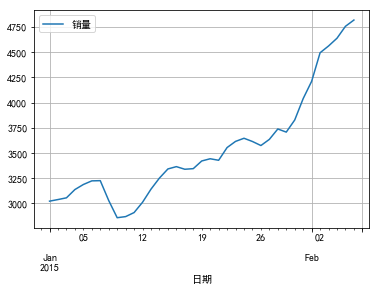

In [45]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #用户正常显示中文
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
data.plot(grid=True) #时序图

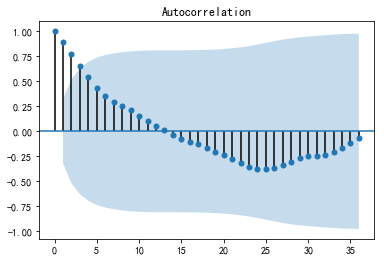

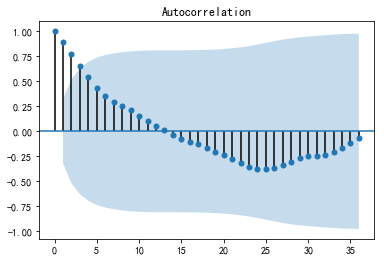

In [46]:
#自相关图
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [47]:
#平稳性检测
from statsmodels.tsa.stattools import adfuller as ADF
ADF(data['销量'])#依次返回为adf、pvalue(P值)、usedlag/nobs/critical values/icbest/regresults/resstore

(1.813771015094529,
 0.9983759421514264,
 10,
 26,
 {'1%': -3.7112123008648155,
  '5%': -2.981246804733728,
  '10%': -2.6300945562130176},
 299.46989866024177)

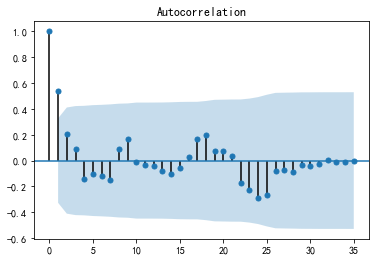

c:\python36\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


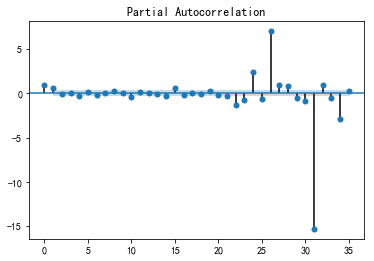

(-3.1560562366723537,
 0.022673435440048798,
 0,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 287.5909090780334)

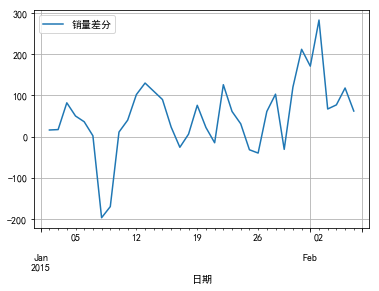

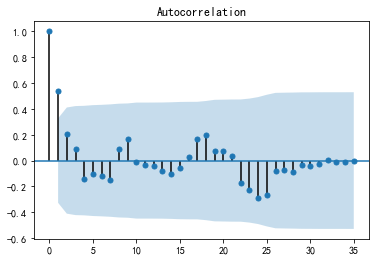

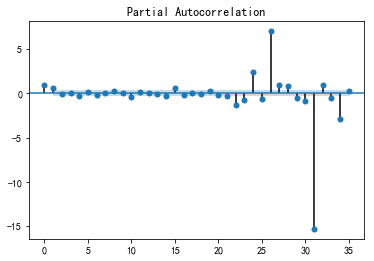

In [48]:
D_data = data.diff().dropna()
D_data.columns = ['销量差分']
D_data.plot(grid=True)
plot_acf(D_data) #自相关
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_data['销量差分']) #偏自相关
ADF(D_data['销量差分']) 

In [49]:
#白噪声检测
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(D_data,lags=1)

(array([11.30402222]), array([0.00077339]))

In [56]:
#定阶
from statsmodels.tsa.arima_model import ARIMA
pmax = int(len(D_data)/10) #一般阶数不超过length/10
qmax = int(len(D_data)/10)
bic_matrix = [] #bic矩阵
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(data,(p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)
    
bic_matrix = DataFrame(bic_matrix)
bic_matrix

c:\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarnin

c:\python36\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\python36\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


,0,1,2,3
0,432.068472,422.510082,426.088911,426.595507
1,423.628276,426.073601,NaN,NaN
2,426.774824,427.395896,430.709154,NaN
3,430.317524,NaN,NaN,436.478109


In [60]:
p,q = bic_matrix.stack().idxmin() 
p
q

0

1

In [61]:
model = ARIMA(data,(p,1,q)).fit() #建立ARIMA（0,1,1）模型
model.summary2()#给出一份模型报告
model.forecast(5)#作为期5天的预测，返回预测结果、标准误差、置信区间

c:\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 422.5101  
Dependent Variable: D.销量             Log-Likelihood:      -205.88   
Date:               2018-06-30 09:43 Scale:               1.0000    
No. Observations:   36               Method:              css-mle   
Df Model:           2                Sample:              01-02-2015
Df Residuals:       34                                    02-06-2015
Converged:          1.0000           S.D. of innovations: 73.086    
No. Iterations:     19.0000          HQIC:                419.418   
AIC:                417.7595                                        
----------------------------------------------------------------------
               Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const         49.9560    20.1390   2.4806   0.0182   10.4843   89.4277
ma.L1.D.销量     0.6710     0.1648   4.0712   0.0003    0.3480    0.9941
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
MA.1           -1.4902             0.0000           1.4902             0.5000
====================================================================

"""

(array([4873.966553 , 4923.9225691, 4973.8785852, 5023.8346013,
        5073.7906174]),
 array([ 73.08574175, 142.3268269 , 187.54286354, 223.80287235,
        254.95710557]),
 array([[4730.72113139, 5017.2119746 ],
        [4644.96711434, 5202.87802385],
        [4606.30132711, 5341.45584329],
        [4585.18903185, 5462.48017074],
        [4574.08387288, 5573.49736192]]))

# ARIMA实战解剖[链接]
[链接]:https://blog.csdn.net/hal_sakai/article/details/51965657

In [62]:
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

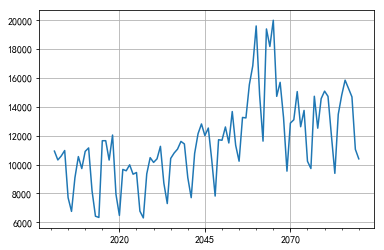

In [73]:
dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422, 
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355, 
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767, 
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232, 
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248, 
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722, 
11999,9390,13481,14795,15845,15271,14686,11054,10395]
dta=pd.Series(dta)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001','2090'))
dta.plot(grid=True)

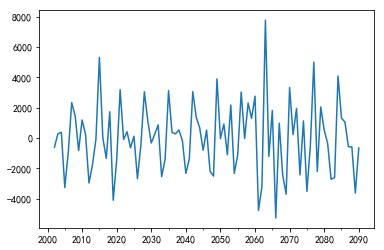

In [74]:
#ARIMA 模型对时间序列的要求是平稳型。因此，当你得到一个非平稳的时间序列时，首先要做的即是做时间序列的差分，
#直到得到一个平稳时间序列。如果你对时间序列做d次差分才能得到一个平稳序列，那么可以使用ARIMA(p,d,q)模型，其中d是差分次数。
fig = plt.figure()
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

c:\python36\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


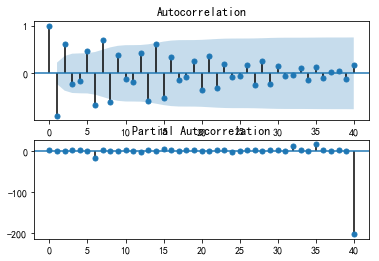

In [91]:
#现在我们已经得到一个平稳的时间序列，接来下就是选择合适的ARIMA模型，即ARIMA模型中合适的p,qp,q。 
#第一步我们要先检查平稳时间序列的自相关图和偏自相关图。
dta= dta.diff(1).dropna()#我们已经知道要使用一阶差分的时间序列，之前判断差分的程序可以注释掉
fig = plt.figure()
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)

# 离群点检测

In [94]:
#使用KMeans算法聚类消费行为
data = pd.read_excel('./原书代码数据/chapter5/demo/data/consumption_data.xls',index_col='Id')
data.head()

,R,F,M
Id,,,
1,27,6,232.61
2,3,5,1507.11
3,4,16,817.62
4,3,11,232.81
5,14,7,1913.05


In [97]:
k = 3#聚类类别

iteration = 500 #最大循环次数
data_tz = 1.0*(data-data.mean())/data.std() #数据标准化

In [102]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k,n_jobs=4,max_iter=iteration)
model.fit(data_tz)
model.cluster_centers_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([[ 3.45505486, -0.29565357,  0.44912342],
       [-0.14935336, -0.65889299, -0.27177977],
       [-0.16045063,  1.11480154,  0.39284443]])

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>

In [110]:
#标准化数据及其类别
r = pd.concat([data_tz,Series(model.labels_,index=data_tz.index)],axis=1)
r.columns = list(data.columns)+['聚类类别']
r.head()

,R,F,M,聚类类别
Id,,,,
1,0.764186,-0.493579,-1.158711,1
2,-1.024757,-0.630079,0.622527,1
3,-0.950217,0.871423,-0.341103,2
4,-1.024757,0.188922,-1.158432,1
5,-0.204824,-0.357079,1.189868,1


In [117]:
norm= []
for i in range(k):
    norm_tmp = r[['R','F','M']][r['聚类类别']==1]-model.cluster_centers_[i]
    norm_tmp = norm_tmp.apply(np.linalg.norm,axis=1) #绝对距离
    norm.append(norm_tmp/norm_tmp.median())
    
norm = pd.concat(norm)

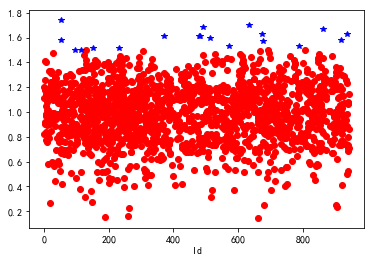

In [124]:
threshold = 1.5 #离散点阀值
plt.rcParams['font.sans-serif'] = ['SimHei'] #用户正常显示中文
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
norm[norm <= threshold].plot(style='ro')
norm[norm > threshold].plot(style='b*')

In [129]:
np.linalg.norm([1,2])

2.23606797749979